<h1 align = "center">Up-to-date Sleep Health/Lifestyle Analysis and Prediction</h1>

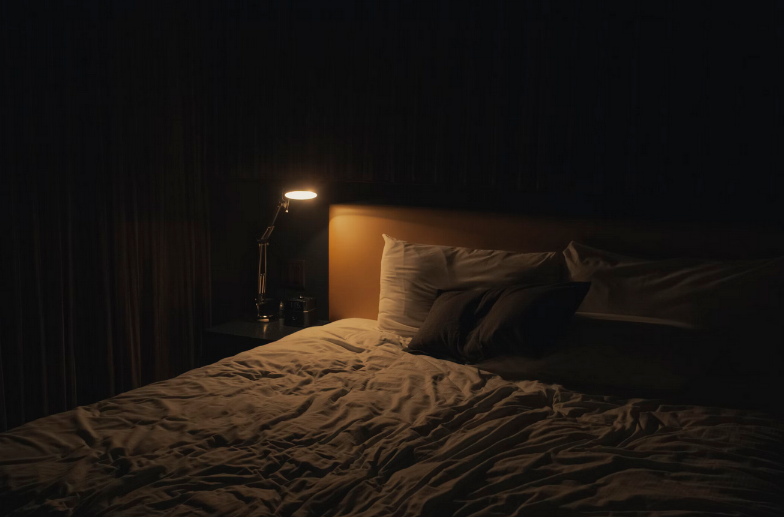

# Project Content

1. [Introduction](#1)
    * 1.1 [Examining the Project Topic](#2)
    * 1.2 [Recognizing Variables in the Dataset](#3)
2. [First Organization](#4)
    * 2.1 [Required Python Libraries](#5)
        * 2.1.1 [Basic Libraries](#6)
    * 2.2 [Loading the Dataset](#7) 
    * 2.3 [Initial Analysis on the Dataset](#8)
3. [Preparation for Exploratory Data Analysis (EDA)](#9)
    * 3.1 [Examining Missing Values](#10)
    * 3.2 [Examining Unique Values](#11)
    * 3.3 [Separating the Variables (Numerical or Categorical](#12)
    * 3.3 [Examining Statistics of Variables](#13)
        * 3.3.1 [Analysis Outputs](#14)
4. [Exploratory Data Analysis (EDA)](#15)
    * 4.1 [Uni-variate Analysis](#16)
        * 4.1.1 [Numerical Variables (Analysis with **Distplot**)](#17)
    * 4.2 [Distribution Visualization](#18)
    * 4.3 [Visualizing Pearson correlation with a Heatmap](#19)
    * 4.4 [Examining t-statistic and p-values from the Dataset](#20)
5. [Conclusion](#21)
        

# 1. Introduction <a id=1></a>

This project is meant to be a learning process for getting familiar with Python in the context of Data Science, and basic statistics. If this dataset had normal distributions, it would have also been used as a self-introduction to machine learning. 

In any case, it was very fun to explore the relationship between fitness, sleep health, and stress from such a large, open-source dataset and be able to apply data science and statistics concepts to it. The link to the "Sleep Health Data" dataset [can be found here](https://www.kaggle.com/datasets/imaginativecoder/sleep-health-data-sampled/data). Thanks to Kaggle user Imaginative_Coder, who prepared the study!

## 1.1 Examining the Project Topic <a id=2></a>

### What is Sleep Health?

Sleep health refers to the quality, duration, timing, and regularity of sleep, as well as the behaviors and habits that promote optimal sleep. It encompasses both the physiological aspects of sleep and the psychological and environmental factors that influence sleep patterns. It is essential for one's overall well-being and is associated with numerous physical, cognitive, and emotional benefits.

When **sleep health** is **prioritized**, it can lead to **improved mood, cognitive function, immune function, cardiovascular health, and overall quality of life**. Conversely, chronic sleep deprivation or poor sleep quality can contribute to a range of negative outcomes, including increased risk of obesity, diabetes, cardiovascular disease, depression, and impaired cognitive performance. Therefore, adopting habits and behaviors that support good sleep health is crucial for optimal functioning and well-being.

### How is Fitness tied to Sleep Health?

Fitness plays a significant role in sleep health, as regular physical activity has been shown to positively influence both the quality and duration of sleep. Regular exercise has been associated with shorter sleep onset latency, meaning it may help individuals fall asleep more quickly after going to bed (including those with sleeping disorders. Beyond its direct effects on sleep, regular exercise is associated with numerous health benefits, including reduced risk of stress, obesity, cardiovascular disease, and depression, all of which can impact sleep health.

## 1.2 Recognizing Variables in the Dataset <a id=3><a/>

There are thirteen variables/columns:
1. **Person ID**: An identifier for each individual.
2. **Sex**: The sex of the person (Male/Female).
3. **Age**: The age of the person in years.
4. **Occupation**: The occupation or profession of the person.
5. **Sleep Duration (hours)**: The number of hours the person sleeps per day.
6. **Quality of Sleep (scale: 1-10)**: A subjective rating of the quality of sleep, ranging from 1 to 10.
7. **Physical Activity Level (minutes/day)**: The number of minutes the person engages in physical activity daily.
8. **Stress Level (scale: 1-10)**: A subjective rating of the stress level experienced by the person, ranging from 1 to 10.
9. **BMI Category**: The BMI category of the person (e.g., Underweight, Normal, Overweight).
10. **Blood Pressure (systolic/diastolic)**: The blood pressure measurement of the person, indicated as systolic pressure over diastolic pressure.
11. **Heart Rate (bpm)**: The resting heart rate of the person in beats per minute.
12. **Daily Steps**: The number of steps the person takes per day.
13. **Sleep Disorder**: The presence or absence of a sleep disorder in the person (Healthy, Insomnia, Sleep Apnea).

*Details about Sleep Disorder Column*:

- **Healthy**: The individual does not exhibit any specific sleep disorder.
- **Insomnia**: The individual experiences difficulty falling asleep or staying asleep, leading to inadequate or poor-quality sleep.
- **Sleep Apnea**: The individual suffers from pauses in breathing during sleep, resulting in disrupted sleep patterns and potential health risks.

These variable definitions are the same that are found in the "Sleep Health Data" dataset. [The link can be found here](https://www.kaggle.com/datasets/imaginativecoder/sleep-health-data-sampled/data). Again, thanks to Kaggle user Imaginative_Coder, who prepared the study.

# 2. First Organization <a id=4>

## 2.1 Required Python Libraries <a id=5>

### 2.1.1 Basic Libraries <a id=6></a>

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt # graphing
import seaborn as sns # graphing

from tabulate import tabulate # For making the t-statistic and p-value table look pretty
from scipy.stats import ttest_ind # For the t-statistic and p-value table

/kaggle/input/sleep-health-data-sampled/Sleep_Data_Sampled.csv


## 2.2 Loading the Dataset <a id=7>

In [3]:
df = pd.read_csv("/kaggle/input/sleep-health-data-sampled/Sleep_Data_Sampled.csv")

In [4]:
df

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,35,Doctor,6.65,7,50,7,Normal Weight,120/80,71,7100,Healthy
1,2,Male,42,Teacher,6.90,8,52,4,Normal,135/90,66,7000,Healthy
2,3,Male,34,Software Engineer,6.95,7,66,6,Overweight,126/83,74,6100,Healthy
3,4,Male,32,Doctor,6.90,6,52,7,Normal,120/80,71,6500,Healthy
4,5,Male,37,Lawyer,6.85,7,60,6,Normal,125/80,71,6500,Healthy
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,14996,Female,59,Nurse,8.10,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
14996,14997,Female,59,Nurse,8.00,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
14997,14998,Female,59,Nurse,8.10,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
14998,14999,Female,59,Nurse,8.10,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


## 2.3 Initial Analysis on the Dataset <a id=8>

In [5]:
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,35,Doctor,6.65,7,50,7,Normal Weight,120/80,71,7100,Healthy
1,2,Male,42,Teacher,6.90,8,52,4,Normal,135/90,66,7000,Healthy
2,3,Male,34,Software Engineer,6.95,7,66,6,Overweight,126/83,74,6100,Healthy
3,4,Male,32,Doctor,6.90,6,52,7,Normal,120/80,71,6500,Healthy
4,5,Male,37,Lawyer,6.85,7,60,6,Normal,125/80,71,6500,Healthy


In [6]:
print("Shape of Dataset:", df.shape)

Shape of Dataset: (15000, 13)


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                15000 non-null  int64  
 1   Gender                   15000 non-null  object 
 2   Age                      15000 non-null  int64  
 3   Occupation               15000 non-null  object 
 4   Sleep Duration           15000 non-null  float64
 5   Quality of Sleep         15000 non-null  int64  
 6   Physical Activity Level  15000 non-null  int64  
 7   Stress Level             15000 non-null  int64  
 8   BMI Category             15000 non-null  object 
 9   Blood Pressure           15000 non-null  object 
 10  Heart Rate               15000 non-null  int64  
 11  Daily Steps              15000 non-null  int64  
 12  Sleep Disorder           15000 non-null  object 
dtypes: float64(1), int64(7), object(5)
memory usage: 1.5+ MB


* In the listed information above, there are 15000 entries and 13 columns.
* The variable types differ between numerical and object format.
* Aside from the unique ID, there are 7 numerical variables.
* Based solely on first impressions, there's no missing values (NaN/null) in the dataset. This is important when switching over to machine learning; performing an operation on entries with missing values is impossible which results in having to remove or replace data from the dataset.

# 3. Preparation for Exploratory Data Analysis (EDA) <a id=9></a>

### 3.1 Examining Missing Values <a id=10></a>

In [8]:
isnull_number = []

for i in df.columns:
    current_column = df[i].isnull().sum()
    isnull_number.append(current_column)
    
pd.DataFrame(isnull_number, index = df.columns, columns = ["Total Missing Values"])

,Total Missing Values
Person ID,0
Gender,0
Age,0
Occupation,0
Sleep Duration,0
Quality of Sleep,0
Physical Activity Level,0
Stress Level,0
BMI Category,0
Blood Pressure,0


<Axes: >

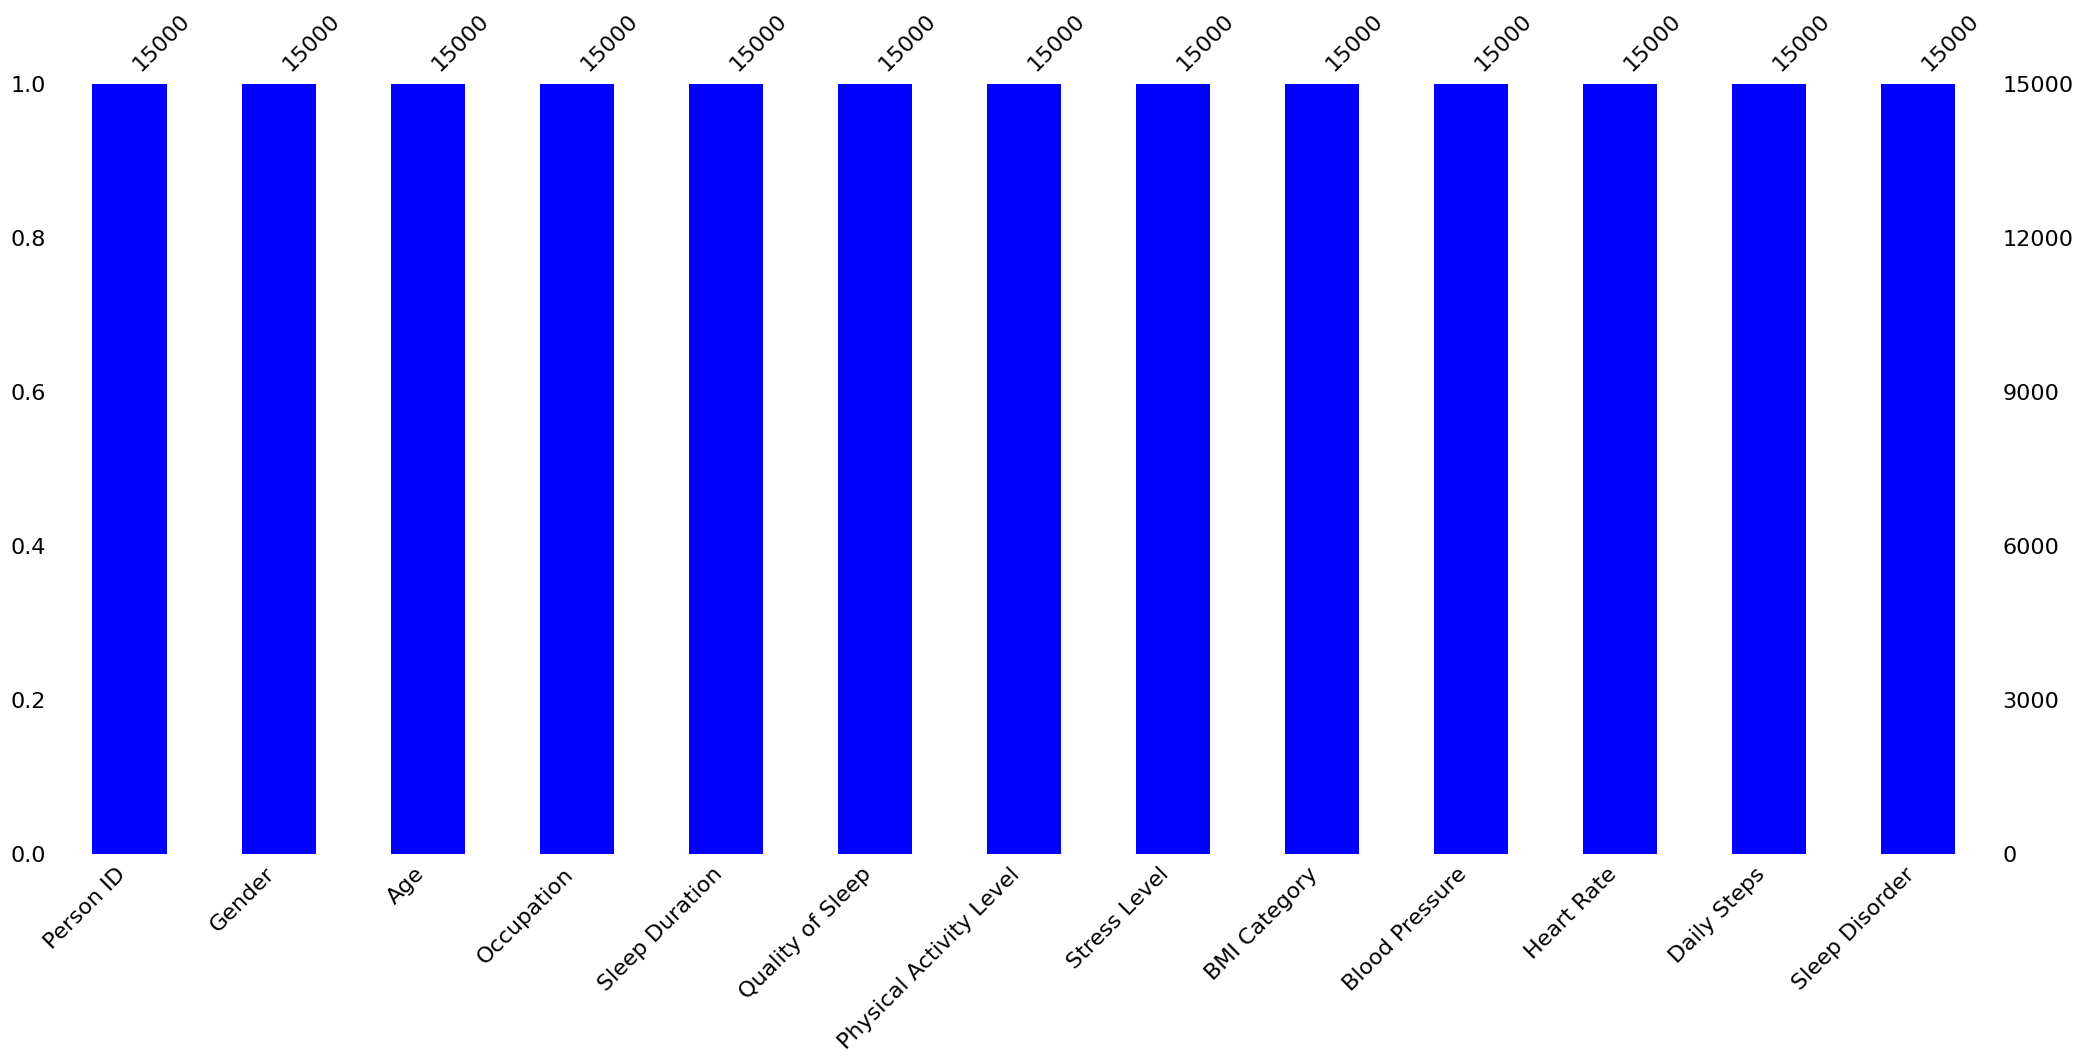

In [9]:
import missingno
missingno.bar(df, color = "b")

It has been proven that there are no missing values, shown via the table and graph above.

### 3.2 Examining Unique Values <a id=11></a>

In [9]:
unique_value = []

for i in df.columns:
    current_column = df[i].value_counts().count()
    unique_value.append(current_column)
    
pd.DataFrame(unique_value, index = df.columns, columns = ["Total Unique Values"])

,Total Unique Values
Person ID,15000
Gender,2
Age,33
Occupation,11
Sleep Duration,55
Quality of Sleep,6
Physical Activity Level,37
Stress Level,6
BMI Category,4
Blood Pressure,25


With this, the data from the numerical values can now be categorized. All of the other object-type variables were already categorial.

* **Numerical Values**: Person ID (omitted), Age, Sleep Duration, Physical Activity Level, Stress Level, Heart Rate, Daily Steps
* **Categorical Values**: Gender (Sex), Occupation, Quality of Sleep, BMI Category, Blood Pressure, Sleep Disorder

### 3.3 Separating Variables (Numerical or Categorical)<a id=12></a>

In [10]:
numeric_var = ["Age", "Sleep Duration", "Quality of Sleep", "Physical Activity Level", "Stress Level", "Heart Rate", "Daily Steps"]
categoric_var = ["Gender", "Occupation", "BMI Category", "Blood Pressure", "Sleep Disorder"]

### 3.4 Examining Statistics of Variables<a id=13></a>

In [11]:
df[numeric_var].describe()

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,44.130667,6.997327,7.131267,59.925000,5.654800,70.857533,6795.080000
std,6.840091,0.615187,1.053111,16.814374,1.393568,3.614836,1329.706484
min,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,40.000000,6.500000,6.000000,45.000000,4.000000,68.000000,6000.000000
50%,44.000000,7.000000,7.000000,60.000000,6.000000,70.000000,6500.000000
75%,48.000000,7.450000,8.000000,75.000000,6.000000,72.000000,7600.000000
max,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


In [12]:
df['Sleep Disorder'].value_counts()

Sleep Disorder
Healthy        5000
Sleep Apnea    5000
Insomnia       5000
Name: count, dtype: int64

<Axes: xlabel='Age', ylabel='Density'>

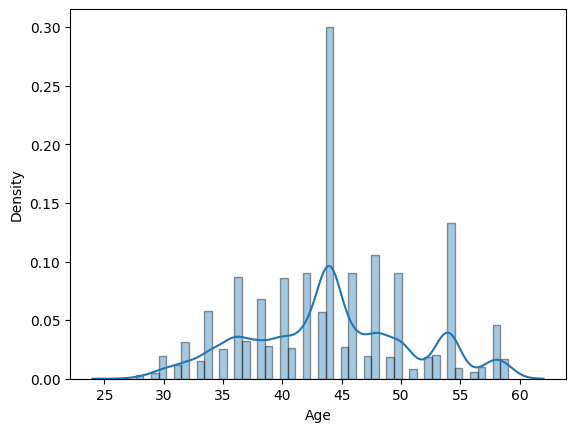

In [13]:
sns.distplot(df["Age"], hist_kws = dict(linewidth = 1, edgecolor = "k"))

<Axes: xlabel='Physical Activity Level', ylabel='Density'>

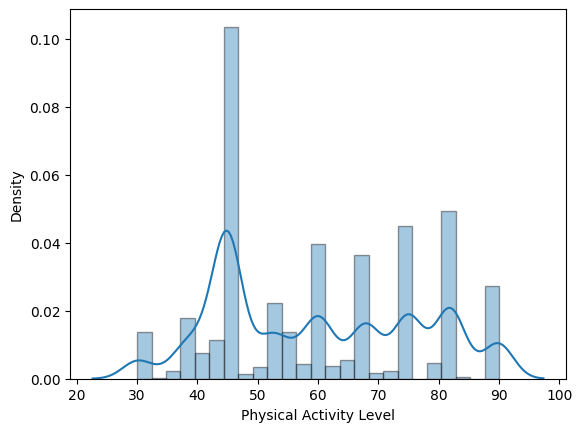

In [14]:
sns.distplot(df["Physical Activity Level"], hist_kws = dict(linewidth = 1, edgecolor = "k"))

<Axes: xlabel='Quality of Sleep', ylabel='Density'>

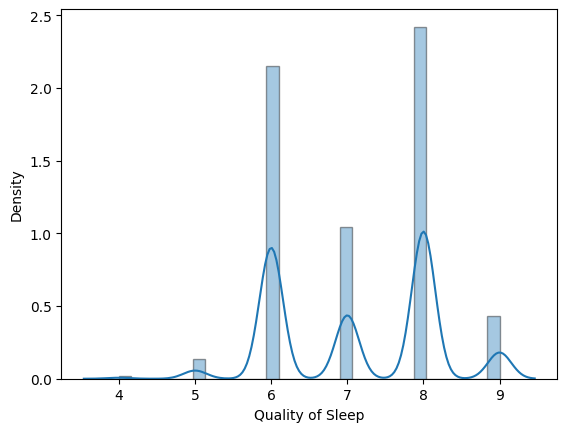

In [15]:
sns.distplot(df["Quality of Sleep"], hist_kws = dict(linewidth = 1, edgecolor = "k"))

<Axes: xlabel='Sleep Duration', ylabel='Density'>

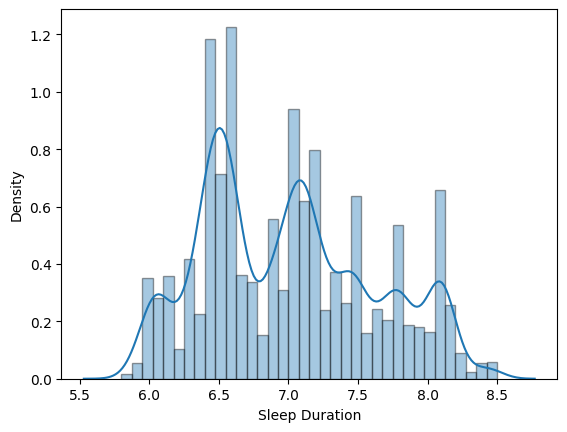

In [16]:
sns.distplot(df["Sleep Duration"], hist_kws = dict(linewidth = 1, edgecolor = "k"))

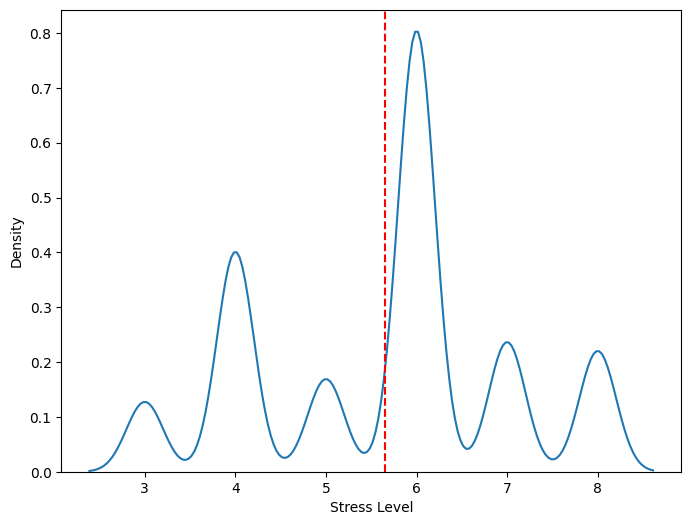

In [17]:
x, y = plt.subplots(figsize = (8, 6))
sns.distplot(df["Stress Level"], hist = False, ax = y)
y.axvline(df["Stress Level"].mean(), color = "r", ls = "--")

# 4. Exploratory Data Analysis (EDA) <a id=15></a>

## 4.1 Uni-variate Analysis<a id=16></a>

## 4.1.1 Numerical Variables (Analysis with **Distplot**) <a id=17></a>

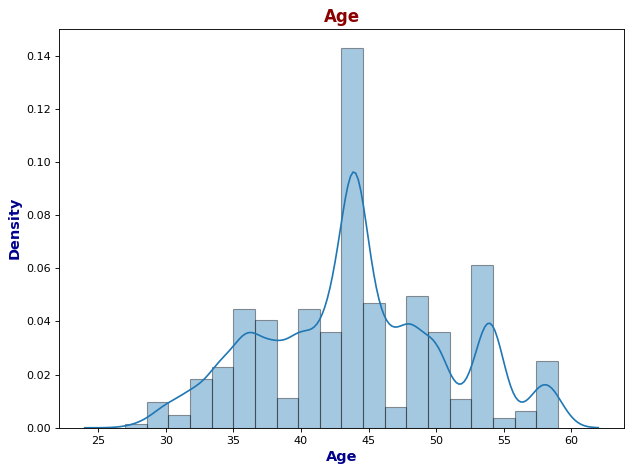

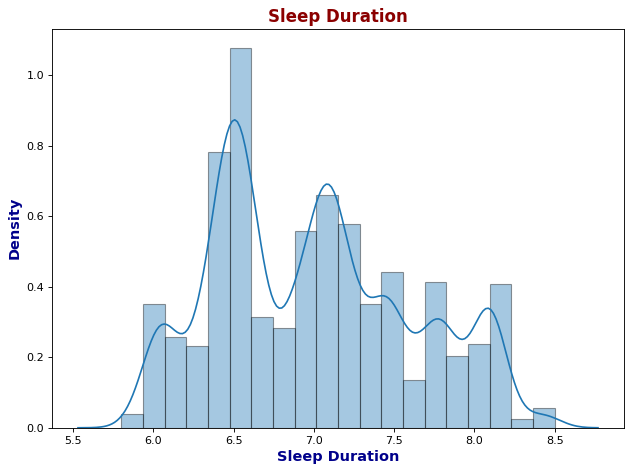

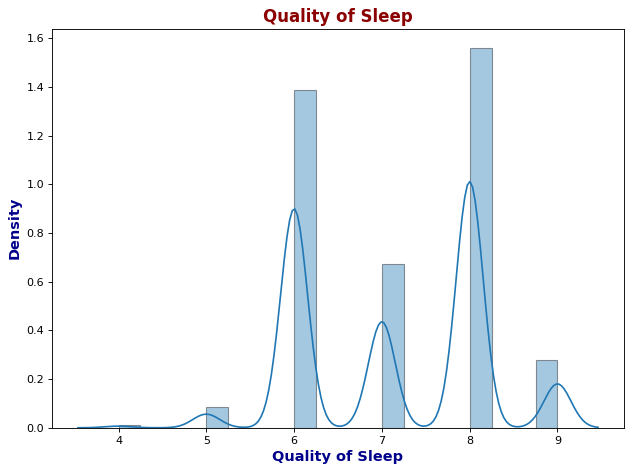

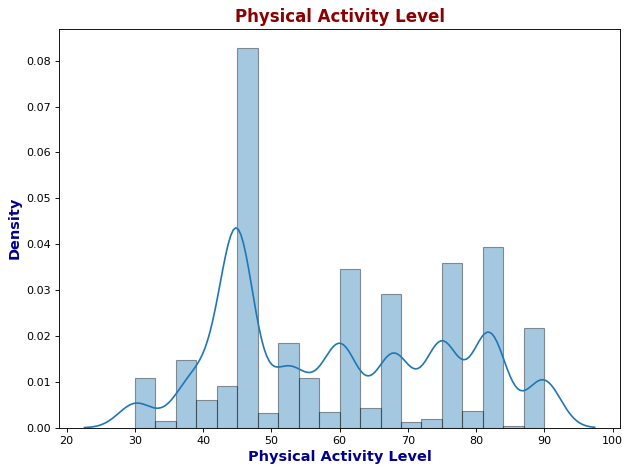

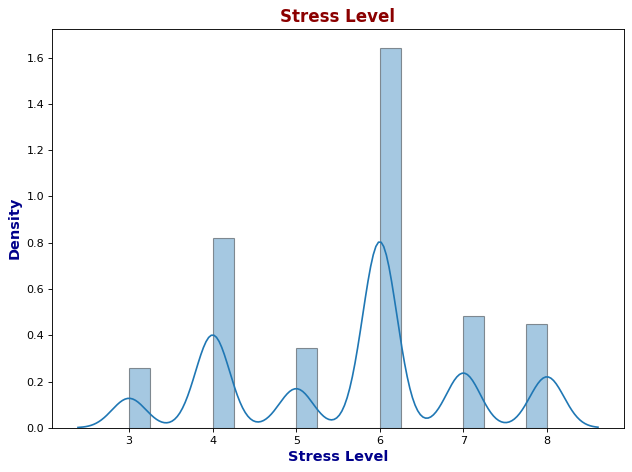

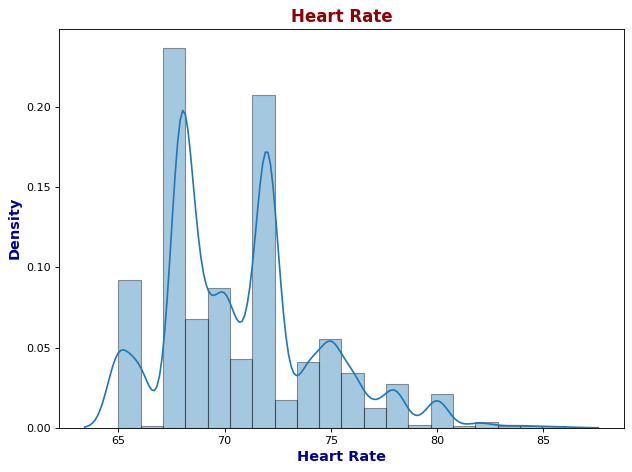

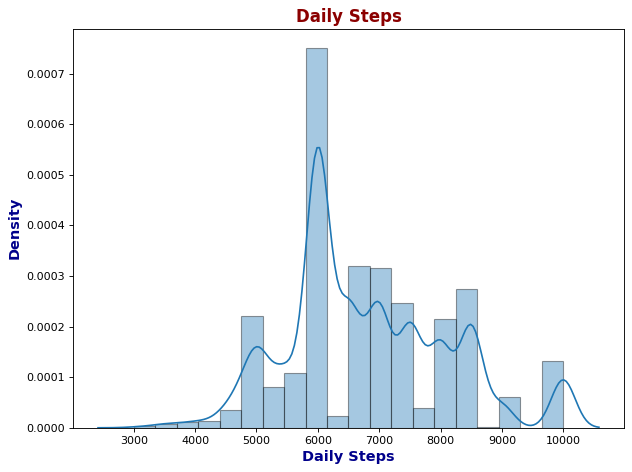

In [18]:
title_font = {"family" : "helvetica", "color" : "darkred", "weight" : "bold", "size" : 15}
axis_font = {"family" : "helvetica", "color" : "darkblue", "weight" : "bold", "size" : 13}

for i in numeric_var:
    plt.figure(figsize = (8, 6), dpi = 80)
    sns.distplot(df[i], hist_kws = dict(linewidth = 1, edgecolor = "k"), bins = 20)
    
    plt.title(i, fontdict = title_font)
    plt.xlabel(i, fontdict = axis_font)
    plt.ylabel("Density", fontdict = axis_font)
    
    plt.tight_layout()
    plt.show

## 4.2 Distribution Visualization <a id=18></a>

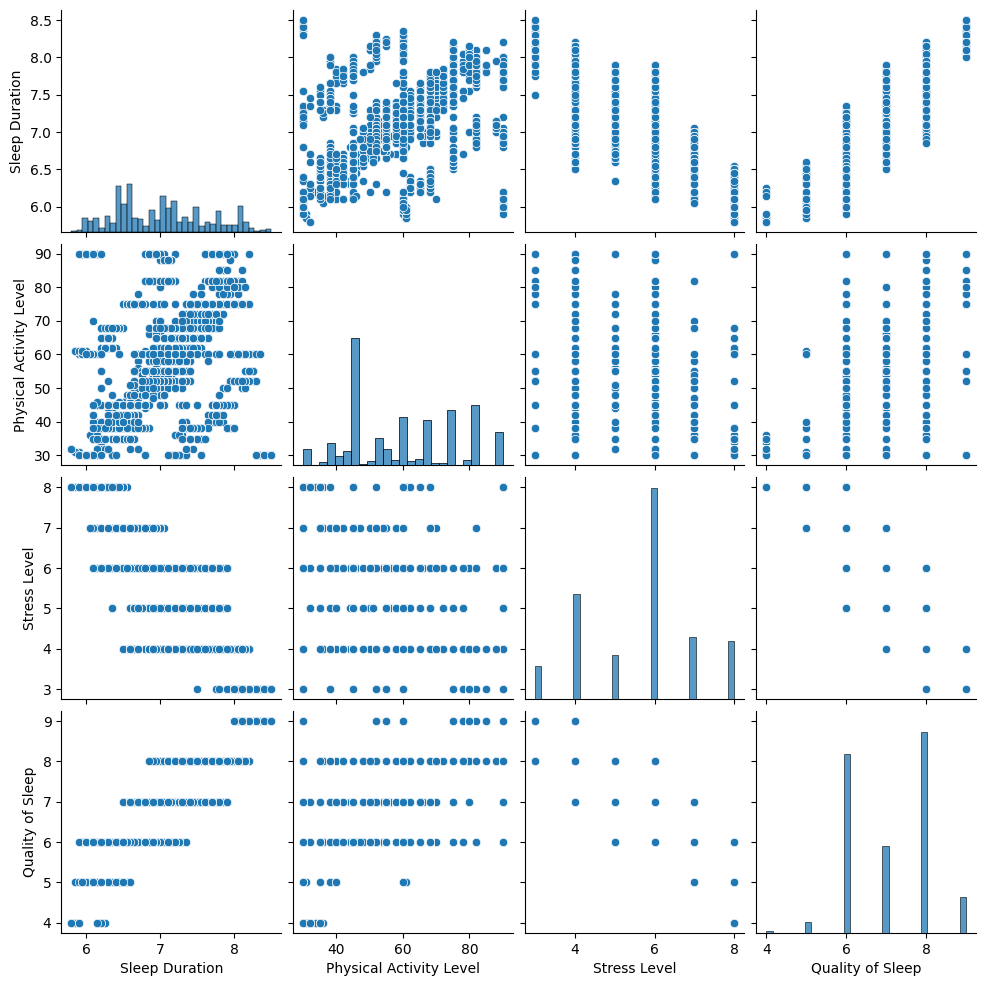

In [19]:
# Visualize distributions
sns.pairplot(df[['Sleep Duration', 'Physical Activity Level', 'Stress Level', 'Quality of Sleep']])
plt.show()

## 4.3 Visualizing Pearson correlation with a Heatmap <a id=19></a>

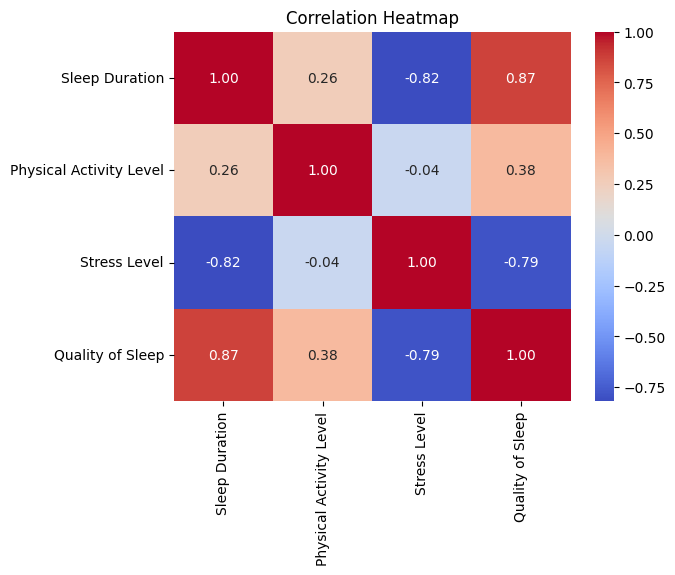

In [20]:
# Calculate Pearson correlation coefficients
correlation_matrix = df[['Sleep Duration', 'Physical Activity Level', 'Stress Level', 'Quality of Sleep']].corr()

# Visualize correlations using a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

## 4.4 Examining t-statistic and p-values from the Dataset<a id=20></a>

In [21]:
try:
    physical_activity_levels = df['Physical Activity Level'].unique()
    activity_results = []
    for level in physical_activity_levels:
        group1 = df[df['Physical Activity Level'] == level]['Quality of Sleep']
        group2 = df[df['Physical Activity Level'] != level]['Quality of Sleep']
        t_stat, p_value = ttest_ind(group1, group2)
        activity_results.append(["Physical Activity Level " + str(level), t_stat, p_value])

    stress_levels = df['Stress Level'].unique()
    stress_results = []
    for level in stress_levels:
        group1 = df[df['Stress Level'] == level]['Quality of Sleep']
        group2 = df[df['Stress Level'] != level]['Quality of Sleep']
        t_stat, p_value = ttest_ind(group1, group2)
        stress_results.append(["Stress Level " + str(level), t_stat, p_value])

    headers = ["Factor", "T-Statistic", "P-Value"]
    print("Results for Physical Activity Level:")
    print(tabulate(activity_results, headers=headers, tablefmt="grid"))
    print("\nResults for Stress Level:")
    print(tabulate(stress_results, headers=headers, tablefmt="grid"))
except KeyError:
    print("Columns 'Physical Activity Level', 'Stress Level', or 'Quality of Sleep' not found in the dataset.")


try:
    physical_activity_levels = df['Physical Activity Level'].unique()
    activity_results = []
    for level in physical_activity_levels:
        group1 = df[df['Physical Activity Level'] == level]['Quality of Sleep']
        group2 = df[df['Physical Activity Level'] != level]['Quality of Sleep']
        t_stat, p_value = ttest_ind(group1, group2)
        activity_results.append(["Physical Activity Level " + str(level), t_stat, p_value])

    stress_levels = df['Stress Level'].unique()
    stress_results = []
    for level in stress_levels:
        group1 = df[df['Stress Level'] == level]['Quality of Sleep']
        group2 = df[df['Stress Level'] != level]['Quality of Sleep']
        t_stat, p_value = ttest_ind(group1, group2)
        stress_results.append(["Stress Level " + str(level), t_stat, p_value])

    headers = ["Factor", "T-Statistic", "P-Value"]
    print("Results for Physical Activity Level:")
    print(tabulate(activity_results, headers=headers, tablefmt="grid"))
    print("\nResults for Stress Level:")
    print(tabulate(stress_results, headers=headers, tablefmt="grid"))
except KeyError:
    print("Columns 'Physical Activity Level', 'Stress Level', or 'Quality of Sleep' not found in the dataset.")


Results for Physical Activity Level:
+----------------------------+---------------+--------------+
| Factor                     |   T-Statistic |      P-Value |
+============================+===============+==============+
| Physical Activity Level 50 |      0.457919 | 0.647017     |
+----------------------------+---------------+--------------+
| Physical Activity Level 52 |      1.14863  | 0.250726     |
+----------------------------+---------------+--------------+
| Physical Activity Level 66 |     -0.557796 | 0.576992     |
+----------------------------+---------------+--------------+
| Physical Activity Level 60 |     11.8617   | 2.61125e-32  |
+----------------------------+---------------+--------------+
| Physical Activity Level 45 |    -43.0422   | 0            |
+----------------------------+---------------+--------------+
| Physical Activity Level 58 |      2.49965  | 0.0124422    |
+----------------------------+---------------+--------------+
| Physical Activity Level 68 |   

# 5. Conclusion <a id=21></a>

Though correlations between different relationships were explored through the series of Python calculations, the main interest was always sleep health (that is, duration of sleep and sleep quality altogether,) and daily physical activity. A correlation coefficient of 0.26 between sleep duration and physical activity level indicates a positive but weak relationship, suggesting that higher physical activity levels are associated with slightly longer sleep durations, but other factors likely contribute to sleep duration as well. This is not new information, and has been discussed in detail in several scholarly articles. However, it is still interesting to observe this in such a large dataset lacking of any normal distributions.

In [13]:
df

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,35,Doctor,6.65,7,50,7,Normal Weight,120/80,71,7100,Healthy
1,2,Male,42,Teacher,6.90,8,52,4,Normal,135/90,66,7000,Healthy
2,3,Male,34,Software Engineer,6.95,7,66,6,Overweight,126/83,74,6100,Healthy
3,4,Male,32,Doctor,6.90,6,52,7,Normal,120/80,71,6500,Healthy
4,5,Male,37,Lawyer,6.85,7,60,6,Normal,125/80,71,6500,Healthy
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,14996,Female,59,Nurse,8.10,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
14996,14997,Female,59,Nurse,8.00,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
14997,14998,Female,59,Nurse,8.10,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
14998,14999,Female,59,Nurse,8.10,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [14]:
df.drop(df.columns[df.columns.str.contains(
    'unnamed', case=False)], axis=1, inplace=True)
df.drop('Person ID',axis=1,inplace=True)
df

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,Male,35,Doctor,6.65,7,50,7,Normal Weight,120/80,71,7100,Healthy
1,Male,42,Teacher,6.90,8,52,4,Normal,135/90,66,7000,Healthy
2,Male,34,Software Engineer,6.95,7,66,6,Overweight,126/83,74,6100,Healthy
3,Male,32,Doctor,6.90,6,52,7,Normal,120/80,71,6500,Healthy
4,Male,37,Lawyer,6.85,7,60,6,Normal,125/80,71,6500,Healthy
...,...,...,...,...,...,...,...,...,...,...,...,...
14995,Female,59,Nurse,8.10,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
14996,Female,59,Nurse,8.00,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
14997,Female,59,Nurse,8.10,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
14998,Female,59,Nurse,8.10,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [15]:
df['Occupation'].value_counts()

Occupation
Nurse                   4316
Teacher                 2199
Salesperson             1974
Doctor                  1856
Engineer                1719
Lawyer                  1340
Accountant              1134
Scientist                193
Software Engineer        132
Sales Representative     115
Manager                   22
Name: count, dtype: int64

In [16]:
df.dtypes

Gender                      object
Age                          int64
Occupation                  object
Sleep Duration             float64
Quality of Sleep             int64
Physical Activity Level      int64
Stress Level                 int64
BMI Category                object
Blood Pressure              object
Heart Rate                   int64
Daily Steps                  int64
Sleep Disorder              object
dtype: object

In [17]:
df.drop('Occupation',axis=1,inplace=True)

In [18]:
df.dtypes

Gender                      object
Age                          int64
Sleep Duration             float64
Quality of Sleep             int64
Physical Activity Level      int64
Stress Level                 int64
BMI Category                object
Blood Pressure              object
Heart Rate                   int64
Daily Steps                  int64
Sleep Disorder              object
dtype: object

In [19]:
y = df.iloc[:,-1].values

In [20]:
df.drop('Sleep Disorder',axis=1,inplace=True)

In [21]:
df.dtypes

Gender                      object
Age                          int64
Sleep Duration             float64
Quality of Sleep             int64
Physical Activity Level      int64
Stress Level                 int64
BMI Category                object
Blood Pressure              object
Heart Rate                   int64
Daily Steps                  int64
dtype: object

In [22]:
df[['SBP', 'DBP']] = df['Blood Pressure'].str.split('/', expand=True)

In [23]:
df.dtypes

Gender                      object
Age                          int64
Sleep Duration             float64
Quality of Sleep             int64
Physical Activity Level      int64
Stress Level                 int64
BMI Category                object
Blood Pressure              object
Heart Rate                   int64
Daily Steps                  int64
SBP                         object
DBP                         object
dtype: object

In [24]:
df.drop('Blood Pressure',axis=1,inplace=True)
df = df.astype({'SBP': int, 'DBP': int})
df.dtypes

Gender                      object
Age                          int64
Sleep Duration             float64
Quality of Sleep             int64
Physical Activity Level      int64
Stress Level                 int64
BMI Category                object
Heart Rate                   int64
Daily Steps                  int64
SBP                          int64
DBP                          int64
dtype: object

In [25]:
df = df.replace(to_replace=['Female','Male'],value=[0,1])

In [26]:
df.head()

,Gender,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,SBP,DBP
0,1,35,6.65,7,50,7,Normal Weight,71,7100,120,80
1,1,42,6.90,8,52,4,Normal,66,7000,135,90
2,1,34,6.95,7,66,6,Overweight,74,6100,126,83
3,1,32,6.90,6,52,7,Normal,71,6500,120,80
4,1,37,6.85,7,60,6,Normal,71,6500,125,80


In [27]:
df['BMI Category'].value_counts()

BMI Category
Overweight       8755
Normal           4962
Obese             659
Normal Weight     624
Name: count, dtype: int64

In [28]:
df = df.replace(to_replace=['Normal Weight'],value=['Underweight'])

In [29]:
df['BMI Category'].value_counts()

BMI Category
Overweight     8755
Normal         4962
Obese           659
Underweight     624
Name: count, dtype: int64

In [30]:
df = df.replace(to_replace=['Underweight','Normal','Overweight','Obese'],value=[0,1,2,3])
df.dtypes

Gender                       int64
Age                          int64
Sleep Duration             float64
Quality of Sleep             int64
Physical Activity Level      int64
Stress Level                 int64
BMI Category                 int64
Heart Rate                   int64
Daily Steps                  int64
SBP                          int64
DBP                          int64
dtype: object

In [31]:
df.isna().sum()

Gender                     0
Age                        0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Heart Rate                 0
Daily Steps                0
SBP                        0
DBP                        0
dtype: int64

In [32]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)# Healthy = 0, Insomnia = 1, Sleep apnea = 2

In [34]:
np.unique(y)

array([0, 1, 2])

In [35]:
df['Sleep Disorder'] = y

In [36]:
df

,Gender,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,SBP,DBP,Sleep Disorder
0,1,35,6.65,7,50,7,0,71,7100,120,80,0
1,1,42,6.90,8,52,4,1,66,7000,135,90,0
2,1,34,6.95,7,66,6,2,74,6100,126,83,0
3,1,32,6.90,6,52,7,1,71,6500,120,80,0
4,1,37,6.85,7,60,6,1,71,6500,125,80,0
...,...,...,...,...,...,...,...,...,...,...,...,...
14995,0,59,8.10,9,75,3,2,68,7000,140,95,2
14996,0,59,8.00,9,75,3,2,68,7000,140,95,2
14997,0,59,8.10,9,75,3,2,68,7000,140,95,2
14998,0,59,8.10,9,75,3,2,68,7000,140,95,2


In [37]:
df.to_csv('processed.csv')

In [38]:
x = df.iloc[:,:].values
x

array([[  1.  ,  35.  ,   6.65, ..., 120.  ,  80.  ,   0.  ],
       [  1.  ,  42.  ,   6.9 , ..., 135.  ,  90.  ,   0.  ],
       [  1.  ,  34.  ,   6.95, ..., 126.  ,  83.  ,   0.  ],
       ...,
       [  0.  ,  59.  ,   8.1 , ..., 140.  ,  95.  ,   2.  ],
       [  0.  ,  59.  ,   8.1 , ..., 140.  ,  95.  ,   2.  ],
       [  0.  ,  59.  ,   8.1 , ..., 140.  ,  95.  ,   2.  ]])

In [39]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score

# Initialize the models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier()
}

# Evaluate each model using cross-validation
cv_scores = {}
for model_name, model in models.items():
    scores = cross_val_score(model, x_train, y_train, cv=5, scoring='accuracy')
    cv_scores[model_name] = np.mean(scores)
    print(f'{model_name}: {np.mean(scores):.4f}')

# Fit the best model on the training set and evaluate on the test set
best_model_name = max(cv_scores, key=cv_scores.get)
best_model = models[best_model_name]
best_model.fit(x_train, y_train)
y_pred = best_model.predict(x_test)
test_accuracy = accuracy_score(y_test, y_pred)

print(f'\nBest Model: {best_model_name}')
print(f'Test Accuracy: {test_accuracy:.4f}')

In [ ]:
import joblib
joblib.dump(best_model, 'best_random_forest_model.joblib')